# 1.Project Setup

## 1.1 Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Mounting to Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.3 Loading Data Set

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/[shared] TEAM FOLDER/[shared] Data Science/movies.csv")

## 1.4 Inspecting & Understanding Data Variables

In [ ]:
with open("/content/drive/MyDrive/[shared] TEAM FOLDER/[shared] Data Science/movie_variables.txt") as f:
    print(f.read())

id:unique identifier for each movie
title: title of the movie
vote_average: average vote of rating given by viewers
vote_count: total count of votes received for the movie
status: the status of the movie, e.g. released, rumored, post production etc 
release_date: the date each movie was released
revenue: total revenue generated by the movie
runtime:duration of the movies in min
budget: the budget allocated for the movie in USD. If 0, no budget data was available
original_language: original language of the movie
popularity: popularity score of the movie. If 0, no popularity data was available (type: float)
genres: genres associated with the movie
production_companies: production companies involved in the movie
production_countries: countries where the movie was produced
spoken_languages: languages spoken in the movie



# 2.Data Cleaning

## 2.1 Handling Missing Values

We first identify missing entries to understand which columns require cleaning or imputation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    63000 non-null  int64  
 1   title                 63000 non-null  object 
 2   vote_average          63000 non-null  float64
 3   vote_count            63000 non-null  int64  
 4   status                63000 non-null  object 
 5   release_date          62973 non-null  object 
 6   revenue               63000 non-null  int64  
 7   runtime               63000 non-null  int64  
 8   budget                63000 non-null  int64  
 9   original_language     63000 non-null  object 
 10  popularity            63000 non-null  float64
 11  genres                62517 non-null  object 
 12  production_companies  56870 non-null  object 
 13  production_countries  60859 non-null  object 
 14  spoken_languages      62046 non-null  object 
dtypes: float64(2), int6

In [ ]:
df.isnull().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
status,0
release_date,27
revenue,0
runtime,0
budget,0
original_language,0


## 2.2 Droping Excess Columns

Remove Columns that are irrelevant or have too many missing values for analysis and modeling to avoid "messiness".

We will work on this on a copy of our dataframe for backup.

In [ ]:
data = df.copy()

In [ ]:
cols_to_drop = ['id' , 'status' , 'production_countries' , 'spoken_languages']
data.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
data.head(2)

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies
0,Inception,8.364,34495,15/07/2010,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict..."
1,Interstellar,8.417,32571,05/11/2014,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc..."


## 2.3 Filling Missing Numerical Values

For numeric columns with missing values, we use median to avoid skewing our data.

In [ ]:
data.select_dtypes(include=["float64" , "int64"]).isnull().sum()

,0
vote_average,0
vote_count,0
revenue,0
runtime,0
budget,0
popularity,0


Since the dataset does not contain any missing numerical values, **no imputation was needed.**

## 2.4 Filling Missing Categorical Values

Categorical features with missing values are filled using their most frequent value.

We evaluated two imputation strategies to achieve the best possible results:
 1. Mode imputation: filling missing values with the most common category
  2. Unknown Category Imputation: replacing missing values with a new category called "unknown"

To understand the effect of each method we compared the impact on the **genre** distribution using side by side visualizations

In [ ]:
# creating copies
data_mode = data.copy()
data_unknown = data.copy()

In [ ]:
# mode category
genre_mode = data["genres"].mode()[0]

# apply mode or unknown
data_mode["genres"] = data_mode["genres"].fillna(genre_mode)
data_unknown["genres"] = data_unknown["genres"].fillna("Unknown")

In [ ]:
# extracting the first listed genres

def get_main_genre(g):
  if isinstance(g, str):
    return g.split(",")[0].strip()
  return "Unknown"

data_mode["main_genre"] = data_mode["genres"].apply(get_main_genre)
data_unknown["main_genre"] = data_unknown["genres"].apply(get_main_genre)

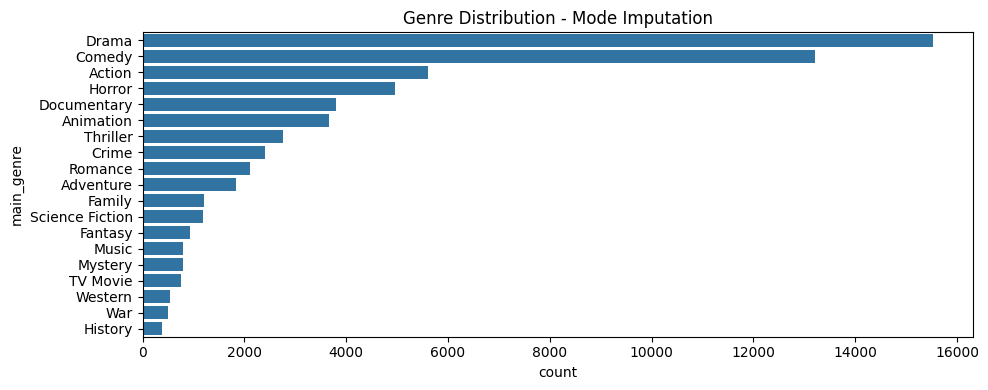

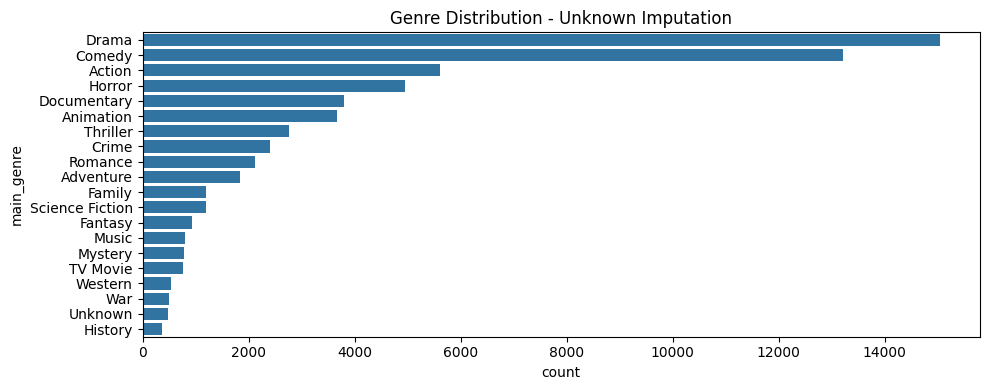

In [ ]:
# visual comparison

plt.figure(figsize=(10,4))
sns.countplot(
    y=data_mode["main_genre"],
    order=data_mode["main_genre"].value_counts().index
)

plt.title("Genre Distribution - Mode Imputation")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(
    y=data_unknown["main_genre"],
    order=data_unknown["main_genre"].value_counts().index
)

plt.title("Genre Distribution - Unknown Imputation")
plt.tight_layout()
plt.show()

Conclusion:

The comparison shows that mode imputation dramatically increases the count of the most frequent genre **Drama**. Therefore, the unknown category produces a more realistic and undistorted distribution.

In [ ]:
# applying the unknown imputation
data["genres"] = data["genres"].fillna("Unknown")
data["production_companies"] = data["production_companies"].fillna("Unknown")

# updating "main_genre" for future use
def get_main_genre(g):
  if isinstance(g, str):
    return g.split(",")[0].strip()
  return "Unknown"

data["main_genre"] = data["genres"].apply(get_main_genre)

## 2.5 Fixing Data Types

Correct datatypes to ensure accurate analysis and modeling

In [ ]:
data.dtypes

,0
title,object
vote_average,float64
vote_count,int64
release_date,object
revenue,int64
runtime,int64
budget,int64
original_language,object
popularity,float64
genres,object


In [ ]:
# optionally removing python warnings for cleaner code

# import warnings
# from warnings import filterwarnings
# filterwarnings("ignore")

In [ ]:
# convert "release_date" to datetime

data["release_date"] = pd.to_datetime(data["release_date"] , errors="coerce")

/tmp/ipython-input-1878037009.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["release_date"] = pd.to_datetime(data["release_date"] , errors="coerce")


In [ ]:
data["release_date"].head()

,release_date
0,2010-07-15
1,2014-11-05
2,2008-07-16
3,2009-12-15
4,2012-04-25


In [ ]:
data.dtypes

,0
title,object
vote_average,float64
vote_count,int64
release_date,datetime64[ns]
revenue,int64
runtime,int64
budget,int64
original_language,object
popularity,float64
genres,object


## 2.6 Removing Duplicates

Duplicate rows can distort learning patterns and need to be cleared

In [ ]:
data.duplicated().sum()

np.int64(0)

There are no duplicate values so no action is needed.

## 2.7 Handling Outliers

Detecting and removing unrealistic values in key numeric columns

In [ ]:
data[['budget' , 'revenue' , 'runtime' ]].describe()

,budget,revenue,runtime
count,6.300000e+04,6.300000e+04,63000.000000
mean,4.163998e+06,1.116228e+07,92.712603
std,1.768219e+07,6.718081e+07,34.771182
min,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,85.000000
50%,0.000000e+00,0.000000e+00,95.000000
75%,0.000000e+00,0.000000e+00,107.000000
max,4.600000e+08,2.923706e+09,960.000000


In [ ]:
def outlier_plot(data, col):
  fig, (ax1, ax2 ,ax3) = plt.subplots(3, 1, figsize=(4, 6))

  sns.histplot(data[col], kde=True, ax=ax1)
  sns.boxplot(x=data[col], ax=ax2)
  sns.histplot(data[col], kde=False, ax=ax3)

  plt.tight_layout()
  plt.show()

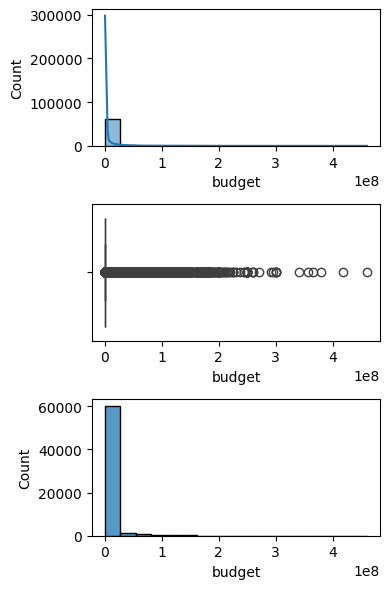

In [ ]:
outlier_plot(data, "budget")

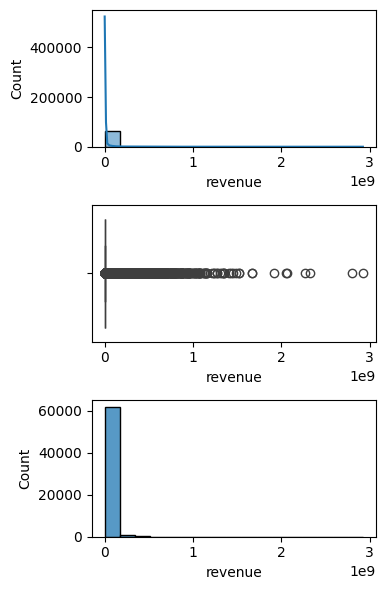

In [ ]:
outlier_plot(data, "revenue")

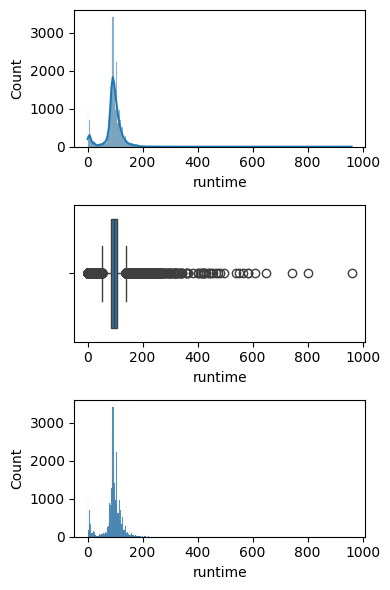

In [ ]:
outlier_plot(data, "runtime")

In [ ]:
# removing movies with >=0 budget & revenue

data = data[(data['budget'] > 0) & (data['revenue'] > 0)]

In [ ]:
# remove unrealistic runtimes

data = data[(data['runtime'] > 10) & (data['runtime'] < 300)]

In [ ]:
# reset index
data = data.reset_index(drop=True)

In [ ]:
data[['budget' , 'revenue' , 'runtime' ]].describe()

,budget,revenue,runtime
count,8.698000e+03,8.698000e+03,8698.000000
mean,2.699881e+07,7.609802e+07,109.642332
std,3.958785e+07,1.651233e+08,21.404137
min,1.000000e+00,1.000000e+00,25.000000
25%,4.000000e+06,4.041884e+06,95.000000
50%,1.265000e+07,1.900000e+07,105.000000
75%,3.100000e+07,7.197538e+07,120.000000
max,4.600000e+08,2.923706e+09,254.000000


In [ ]:
# saving the cleaned data set to our Drive
data.to_csv("/content/drive/MyDrive/[shared] TEAM FOLDER/[shared] Data Science/cleaned_movies.csv", index=False)

# 3.Exploratory Data Analysis

## 3.1 Summary Statistics

Examining central tendencies and data spread for numerical variables

In [ ]:
data.describe(include="all")

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,main_genre
count,8698,8698.000000,8698.000000,8696,8.698000e+03,8698.000000,8.698000e+03,8698,8698.000000,8698,8698,8698
unique,8470,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,1821,7220,20
top,King Kong,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,Drama,Metro-Goldwyn-Mayer,Drama
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,7083,NaN,516,109,2003
mean,NaN,6.430576,1757.418142,2001-05-22 05:14:57.516099328,7.609802e+07,109.642332,2.699881e+07,NaN,22.010908,NaN,NaN,NaN
min,NaN,1.295000,14.000000,1913-11-24 00:00:00,1.000000e+00,25.000000,1.000000e+00,NaN,0.600000,NaN,NaN,NaN
25%,NaN,5.901000,155.000000,1994-05-04 18:00:00,4.041884e+06,95.000000,4.000000e+06,NaN,9.490250,NaN,NaN,NaN
50%,NaN,6.483500,577.000000,2006-04-13 00:00:00,1.900000e+07,105.000000,1.265000e+07,NaN,14.514500,NaN,NaN,NaN
75%,NaN,7.024000,1860.000000,2013-10-09 00:00:00,7.197538e+07,120.000000,3.100000e+07,NaN,22.261000,NaN,NaN,NaN
max,NaN,9.000000,34495.000000,2023-09-26 00:00:00,2.923706e+09,254.000000,4.600000e+08,NaN,2994.357000,NaN,NaN,NaN


1. Total 8,698 movies after removing invalid entries.
2. Budget ranges from 1-460M with median of $12.6M.

3. Revenue ranges from 1-2.9B with median of $19M.
4. Runtime is between 25 and 254 minutes, consistent with full-length films.
5. Vote_average center around 6.4, which is typical for user scores.

- Popularity values are highly skewed, which indicates a few very popular films
- The most common original language is English in 7,083 movies
- The most common frequent genre is Drama in 519 movies

These statistics indicate that the data set is clean, realistic and ready for deeper analysis.

---

## 3.2 Plot Distributions

Visualising the distribution of our numerical values to understand spread, skewness and general behaviour

In [ ]:
def plot_distributions(data, columns, bins=50):
  for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=bins)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

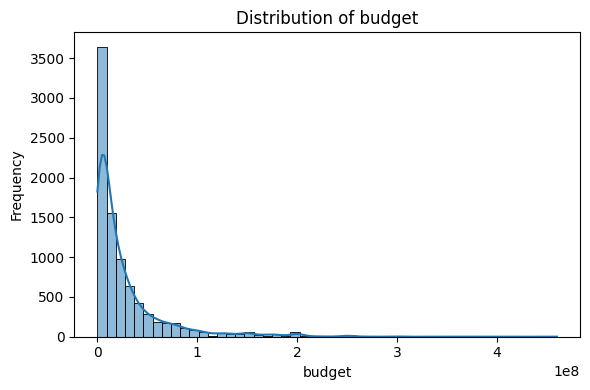

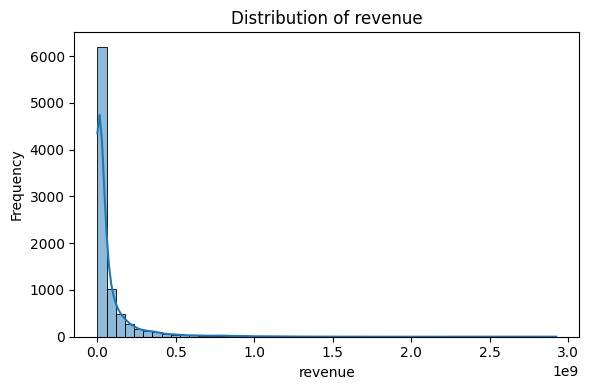

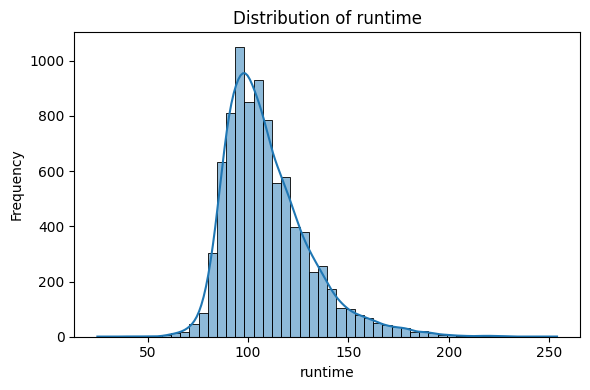

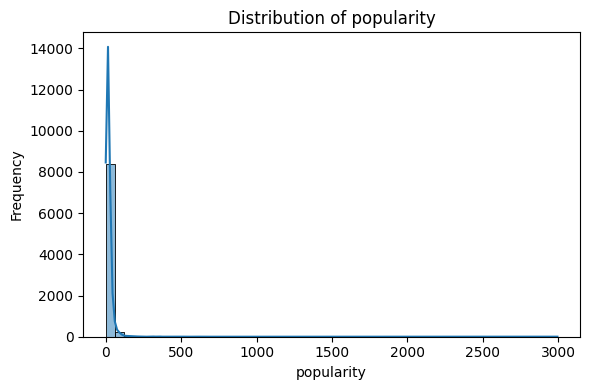

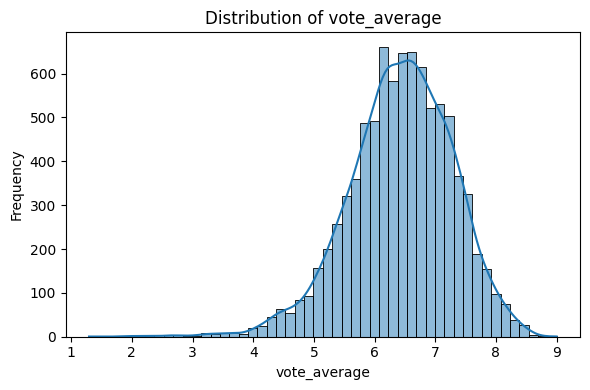

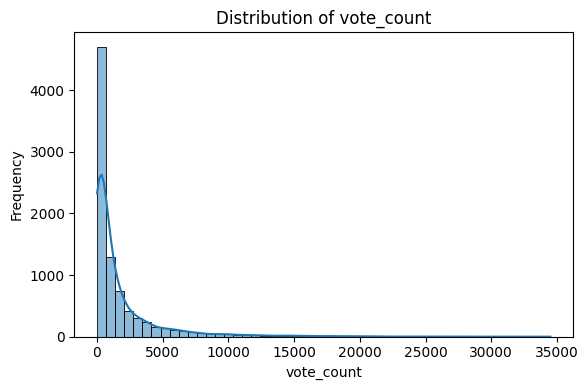

In [ ]:
num_cols = ['budget' , 'revenue' , 'runtime' , 'popularity' , 'vote_average' , 'vote_count']
plot_distributions(data, num_cols)

Plot Distribution Insights:

- Budget and revenue are highly right-skewed, meaning most movies operate with small budgets and model revenues, while a few films dominate the upper range
- Runtime is roughly normally distributed with most movies being between 90 and 120 minutes long
- Vote average shows a tight distribution around 6-7 score which is typical for user ratings
- Vote count is extremely skewed, indicating that only a small number of films receive very high engagement
- Popularity is also strongly right-skewed, indicating the heavy concentratio of attention on few major titles

Overall, the ditributions show that many features contain outliers and long tails, especially revenue, budget, vote count and popularity. These characteristics may influence model performance and could benefit from robust algorithms.

---

## 3.3 Relationship Plots

Exploring how the key variable **Revenue** relates to other key features

In [ ]:
# helper function

def rel_plot(x, y, data):
 plt.figure(figsize=(6,4))
 sns.scatterplot(data=data, x=x, y=y)
 plt.title(f"{y} vs {x}")
 plt.xlabel(x)
 plt.ylabel(y)
 plt.tight_layout()
 plt.show()

### 3.3.1 Revenue vs Budget

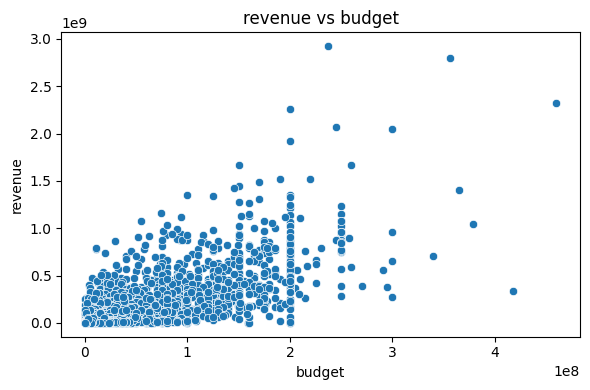

In [ ]:
rel_plot("budget", "revenue", data)

Insights:
- Positive trend: higher budgets generally lead to higher revenues
- The relationship is not perfectly linear - some medium budget films earn very high revenue
- A large cluster of lower-budget movies makes very little revenue
- A few extreme high-budget films reach over $1B, indicating strong blockbuster effects

Overall, budget is a **strong predictor** of revenue, but with significant variance.

---

### 3.3.2 Revenue vs Popularity

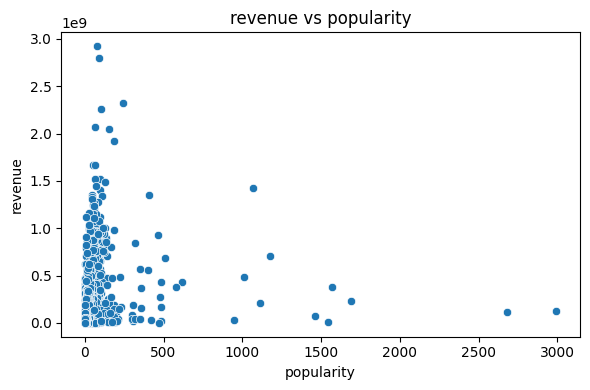

In [ ]:
rel_plot("popularity", "revenue", data)

Insights:
- Most movies have low to moderate popularity scores
- Higher popularity generally corresponds to higher revenue but the relationship is much weaker than budget
- There are several high revenue movies even with modest popularity values

Overall, popularity alone does no fully explain revenue, it likely acts as a **second predictor**

---

### 3.3.3 Revenue vs Release Year

In [ ]:
# extracting the year out of the release_date

data["release_year"] = data["release_date"].dt.year

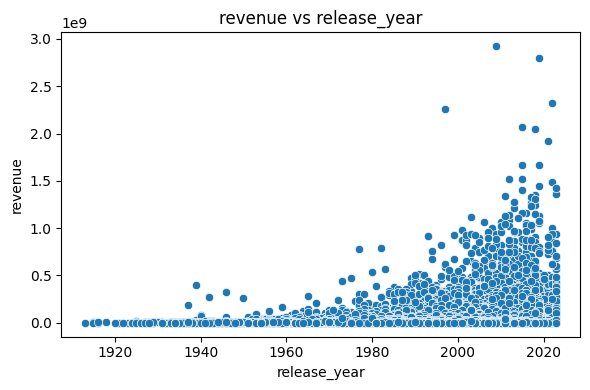

In [ ]:
rel_plot("release_year", "revenue", data)

Insights:
- Movies released after the 1990s show a big increase in potential revenue
- Recent decades , *2000-2020* , contain the most billion dollar releases
- Very old movies before the 1970s, earned significantly lower revenue, likely due to industry size, inflation and other limitations

Overall, there is a clean time based upward trend where newer movies tend to earn more revenue. The scatterplot shows a time trend but the correlation is weak because revenue values vary widely within each year.

---


### 3.3.4 Revenue vs Genre

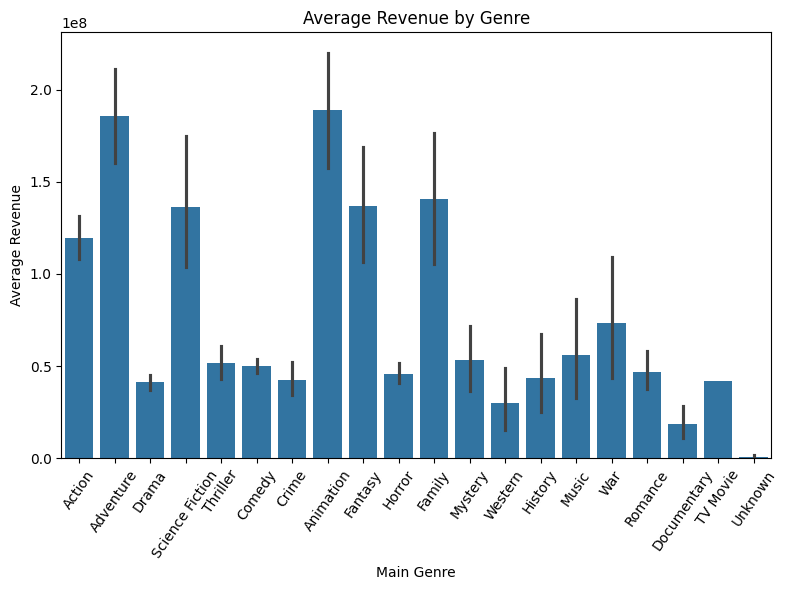

In [ ]:
# plot average for string values

plt.figure(figsize=(8,6))
sns.barplot(data=data, x="main_genre", y="revenue", estimator="mean")
plt.title("Average Revenue by Genre")
plt.xlabel("Main Genre")
plt.ylabel("Average Revenue")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

Insights:
- Animation and Adventure are clearly the top earning genres
- Family, Fantasy and Science Fiction follow, all earning between 136M and 140M
- Action earns less than the top genres, placing it mid-high
- Middle perfoming genres include War, Music, Mystery, Thriller, Comedy, Romance, Horror, History and Crime.
- Lowest average genres include Drana, Western and Documentary, with documentary being the lowest

Overall, the highest revenue genres tend to be blockbuster, family oriented, or fantasy/ science fiction franchises.

---

## 3.4 Correlation Heatmap

Understanding how the numerical features are related to each other by identifying strong positive or negative relationships

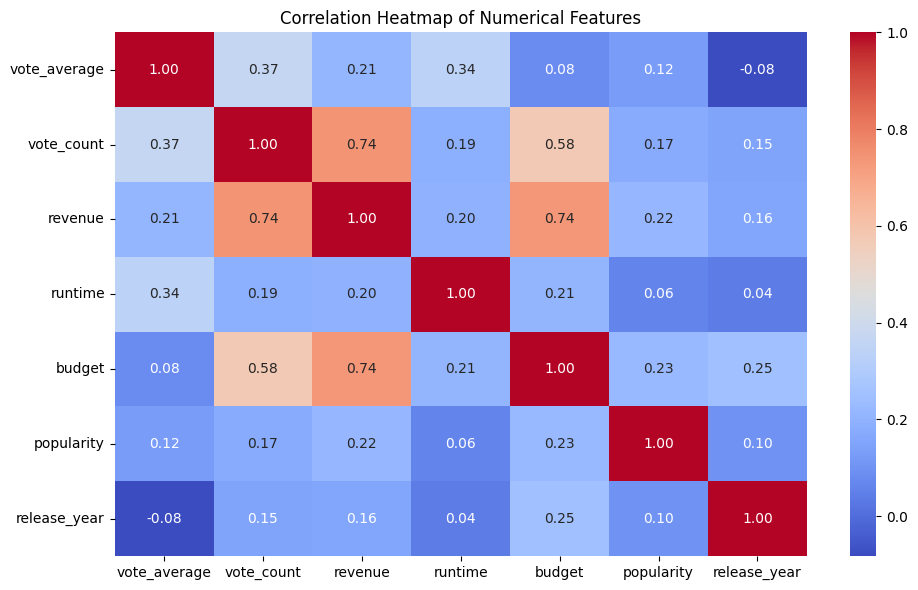

In [ ]:
plt.figure(figsize=(10,6))
numeric_df = data.select_dtypes(include= ["int64" , "float64"])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' , fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

Insights:

- Budget and Revenue have the strongest positive correlation, which confirms that higher budget films tend to earn significantly more revenue, making budget one of the most important predictors
- Vote Count also shows a strong correlation with revenue, which means that big budget films tend to attract more viewers and ratings
- Popularity has a weak positive correlation with revenue, while more popular films sometimes earn more, popularity alone is not a strong predictor
- Runtime has a very weak correlation with revenue, which indicates that movie length does not significantly influence financial performance
- Release year has a weak correlation with revenue, which indicates that newer films tend to earn slightly more, but the effect is small
- Vote Average shows weak correlations with all variables, viewer rating scores do not strongly determine box office revenue

Overall, budget and vote count emerge as the most influential numerical features for predicting revenue, while variables like runtime, popularity and release year provide only limited predictive value

---

## 3.5 Exploratory Data Analysis Summary

Based on both the visual plots and the correlation values, the strongest predictors for movie revenue are:
 - budget
 - vote count
 - popularity *to a lesser extent*

 Runtime, release year and vote average contribute only marginal predictive value compared with these features

Overall, the data set shows clear patterns that align with real-world expectations: big budget, widely watched films that are particularly in blockbuster genres, tend to earn more revenue. The EDA provides strong guidance for model building, suggesting that features like budget, vote count and genre should play central roles in the predictive modeling phase.

---

# 4.Feature Engineering

## 4.1 Creating Useful Features

Extracting additional time based and transformed variables that may improve the predictive ability of our model

In [ ]:
# release year (we already have it)

# release month
data["release_month"] = data['release_date'].dt.month

# movie age- time since release
 # finding the current year dynamically
current_year = pd.Timestamp.now().year
data["movie_age"] = current_year - data["release_year"]

# log transformations for skewness
data["log_budget"] = np.log1p(data['budget'])
data["log_revenue"] = np.log1p(data['revenue'])

## 4.2 Cleaning Existing Features

Removing more columns that are not useful for modeling

In [ ]:
cols_to_drop = ['title', 'production_companies' , 'genres' , 'release_date']

data = data.drop(columns=cols_to_drop)

## 4.3 Encoding Categorical Data

Any remaining categorical features must be converted into numerical format so our ML Model can read them

In [ ]:
# one hot encoding for main_genre
genre_dummies = pd.get_dummies(data["main_genre"], prefix="genre")

# one hot encoding for original_language
lang_dummies = pd.get_dummies(data["original_language"], prefix="lang")

# adding it to the data set
data = pd.concat([data, genre_dummies, lang_dummies], axis=1)

# drop the original columns
data = data.drop(columns=["main_genre" , "original_language"])

## 4.4 Feature Selection

Based on our previous EDA, the strongest predictors of revenue are budget, vote count and popularity. Additional predictors include runtime, movie age and encoded genre/ language categories

In [ ]:
# target variable
y = data['revenue']

# features to include
X = data.drop(columns=["revenue" , "log_revenue"])

In [ ]:
# checking feature shapes
X.shape, y.shape

((8698, 79), (8698,))

The final dataset contains 8,698 rows and 79 predictive features

## 4.5 Final Pre-Modeling Data Check

Although the dataset was cleaned earlier, additional transformations performed during Feature Engineering can introduce new missing values or inconsistent feature shapes

In [ ]:
# checking missing values across all features
X.isna().sum().sort_values(ascending=False).head(20)

,0
release_month,2
release_year,2
movie_age,2
runtime,0
vote_count,0
popularity,0
vote_average,0
budget,0
log_budget,0
genre_Action,0


In [ ]:
# fill any remaining NaN values

X = X.fillna(0)

# 5.Model Building

## 5.1 Train & Test Split

We are splitting the data set into training and testing sets using an 80/20 ratio to ensure that model performance is evaluated on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## 5.2 Baseline Model

This simple model serves as a performance benchmark, any meaningful model should outperform it

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# evaluations
def evaluate_model(y_true, y_pred, model_name="Model"):
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) *100

  print(f"r2 score : {r2:.4f}")
  print(f"MAE score : {mae:.2f}")
  print(f"RMSE score : {rmse:.2f}")
  print(f"MAPE score : {mape:.2f}%")

  return r2, mae, rmse, mape

# baseline prediction is mean revenue
baseline_pred = np.full(len(y_test), y_train.mean())
baseline_metrics = evaluate_model(y_test, baseline_pred, "Baseline")


r2 score : -0.0002
MAE score : 89526576.84
RMSE score : 164345651.55
MAPE score : 10673587.68%


Insights:

- R^2 score is near zero, indicating that the model explains none of the variance in revenue which is normal since a besline model cannot explain revenue
- MAE score is on average, the baseline predictions are off by almost 90M, demonstrating that simply using the mean revenue provides little information
- RMSE shows substantial error for movies with very high or low revenues, reflecting the extreme variability in the dataset
- MAPE occurs because many films in the dataset earned very low revenue, this highlights that MAPE is not reliable for this dataset

Overall, the baseline model provides no predictive value and serves only as a reference point. Any meaningful machine learning model should significantly outperform these results, which is what we were looking for.

---

## 5.3 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# training
lr_pred = lr.predict(X_test)

# evaluation
lr_metrics = evaluate_model(y_test, lr_pred, "Linear Regression")

r2 score : 0.7542
MAE score : 41191494.34
RMSE score : 81471892.80
MAPE score : 6341506.20%


## 5.4 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# training
dt_pred = dt.predict(X_test)

# evaluation
dt_metrics = evaluate_model(y_test, dt_pred, "Decision Tree Regressor")

r2 score : 0.4873
MAE score : 49753292.20
RMSE score : 117667961.63
MAPE score : 236620.28%


## 5.5 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# training
rf_pred = rf.predict(X_test)

# evaluation
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest Regressor")

r2 score : 0.8076
MAE score : 34306857.92
RMSE score : 72084215.86
MAPE score : 411728.56%


## 5.6 Model Evaluation

Each model was evaluated using four standard regression metrics:

- **R^2 Score** measures how much variance in revenue is explained by the model, the higher the better
- **MAE** also known as Mean Absolute Error, is the average absolute difference between predicted and actual revenue, the lower the better
- **RMSE** also known as Root Mean Squarred Error, penalizes large erors more heavily, providing insight into how well the model handles very high grossing films
- **MAPE** also known as Mean Absolute Percentage Error, is reported for completeness but interpreted with caution, since the dataset contains movies with extremely low revenues it makes it unreliable and can inflate dramatically.

---

The evaluation results are:


**Linear Regression**
- r2 score : 0.7542
- MAE score : 41191494.34 / 41.19Mil
- RMSE score : 81471892.80 / 81.47Mil
- MAPE score : 6341506.20% / 6,341,506%

**Decision Tree Regressor**
- r2 score : 0.4873
- MAE score : 49753292.20 / 49.75Mil
- RMSE score : 117667961.63 / 117.67Mil
- MAPE score : 236620.28% / 236,620%

**Random Forest Regressor**
- r2 score : 0.8076
- MAE score : 34306857.92 / 34.30Mil
- RMSE score : 72084215.86 / 72.08Mil
- MAPE score : 411728.56% / 411,728%


These results show that the Random Forest model performs the best overall, achieving the highest R^2 and the lowest error values

Due to extreme revenue outliers and very small revenue values, MAPE is not a reliable metric for this dataset.

---



## 5.7 Model Comparison

- Random Forest is the best performing model, achieving the highest R^2 and the lowest MAE/ RMSE values
- Linear Regression also performs well and provides a strong linear baseline
- Decision Trees underperform due to their tendency to overfit without tuning
- The baseline model performs extremely poorly, as expected, validating the usefulness of the more advanced models

Based on results the **Random Forest Regressor** is selected for hyperparameter tuning and final deployment

---

# 6.Hyperparameter Tunning

This method tests combinations of parameters efficiently and uses cross-validation to avoid overfitting and improve performance

## 6.1 Define Parameter Grid

We tune several key Random Forest hyperparameters that control the models capacity and its tendency to overfit or underfit the data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100,200,300,500],
    "max_depth": [10,20,30,40, None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": ["sqrt" , "log2" , None]
}

## 6.2 RandomizedSearchCV Setup

We use this instead of exhaustively testing all combinations *Grid Search*, which samples a fixed number of random combinations from our grid. This is more efficient while still providing a good chance of finding a strong configuration

We use 3-fold cross validation and optimize for the r2 score/

In [ ]:
# base model
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# random search with cross validation
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=15, # number of combinations
    cv=3, # fold
    scoring="r2",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# training
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=2)

## 6.3 Best Parameters & Cross-Validation Scores

After training we extract the best performing hyperparameter combination and its corresponding cross validation score

In [ ]:
print("Best Parameters:", rf_random.best_params_)
print("Best Cross-Validation R^2:", rf_random.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Best Cross-Validation R^2: 0.7303951474318637


## 6.4 Training & Re-Evaluating Performance

Using the best hyperparameters found, we train a final model on the full training set and evaluate it on the test set. Then, we compare these results with the untuned model to assess the benefit of hyperparameter tunning.

In [ ]:
# best tuned rf model
best_rf = rf_random.best_estimator_

# predictions on test set
best_rf_pred = best_rf.predict(X_test)

# evaluation
best_rf_metrics = evaluate_model(y_test, best_rf_pred, "Tune Random Forest Regressor")

r2 score : 0.8055
MAE score : 34769509.93
RMSE score : 72471721.97
MAPE score : 570121.76%


In [ ]:
# comparison

print("Untuned RF metrics:", rf_metrics)
print("Tuned RF metrics:", best_rf_metrics)

Untuned RF metrics: (0.8075815226158946, 34306857.91697414, np.float64(72084215.85820839), np.float64(411728.5552315133))
Tuned RF metrics: (0.8055071779812499, 34769509.925538816, np.float64(72471721.97302707), np.float64(570121.7645440755))


## 6.5 Feature Importance Analysis

Understanding which features contribute most to prediction

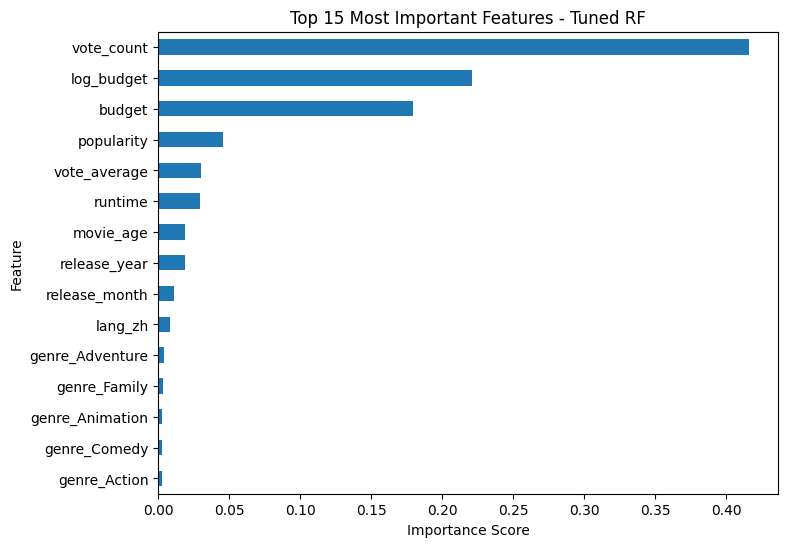

In [ ]:
importances = rf_random.best_estimator_.feature_importances_
feat_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_importance.head(15).plot(kind="barh")
plt.title("Top 15 Most Important Features - Tuned RF")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

Insights:
- Vote count is the strongest predictor, indicating that films with large audience interaction tend to earn more
- Budget and log budget are also highly influential, confirming that higher production spending is strongly associated with higher revenue
- Popularity, average ratings and runtime have moderate impact
- Genre, language, release timing contribute very little, showig that they are not standalone predictors once financial and engagement factors are considered

Overall, revenue is best explained by how widely a film reaches audiances and how much is invested into producing and promoting it.

---

# 7.Model Deployment & Optimisation


## 7.1 Saving the Best model

To enable reuse and deployment the model is serialized and saved to disk

In [ ]:
import joblib

# final model
joblib.dump(best_rf, "best_rf_model.pkl")

# load later
# model = joblib.load("best_rf_model.pkl")

['best_rf_model.pkl']

## 7.2 Creating Prediction Function

This function is created to allow the model to generate revenue predicitions for new, unseen movies.

In [ ]:
def predict_revenue(model, input_features):
  df_input = pd.DataFrame([input_features])
  prediction = model.predict(df_input)[0]

  return prediction

## 7.3 Checking Overfitting

Evaluating generalization capability, model performance was compared between the training and data sets

In [ ]:
train_pred = rf.predict(X_train)
train_r2 = r2_score(y_train, train_pred)

test_r2 = r2_score(y_test, rf_pred)

print("Training R2:", train_r2)
print("Testing R2:", test_r2)

Training R2: 0.9653214909319475
Testing R2: 0.8075815226158946


Insights:

These results indicate moderate overfitting, which is typical for ensemble tree based models. The high training r2 shows that the model fits the training data extremely well. While the lower test r2 shows that the model loses some predictive accuracy on unseen data. However, the difference between test and train performance is acceptable for real world data sets with high variance, such as movie revenue prediction.

Conclusion:
The model generalizes reasonably well despite some overfitting. the performance gap suggests the model captures meaningful relationships but still learns some noise from the training data. Further regularization could reduce overfitting but the current performance is strong enough for deployment.

---

# 8. Conclusion

This project aimed to build a predictive model capable of estimating movie revenue using variables such as budget, popularity, votes, languages and genres. The workflow followed a complete and thorough data science pipeline, from raw dataset exploration to final model deployment.